## Importing required libraries

In [26]:
from bs4 import BeautifulSoup
from selenium import webdriver

import requests
import re
import time
from datetime import datetime

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

from mpl_toolkits.mplot3d import Axes3D

## Gathering cars data from website

<span> I will be using www.cars24.com </span>

In [2]:
def get_car_data(url, file_name):
    driver = webdriver.Chrome('C:\\Users\\gopal\\Downloads\\chromedriver_win32\\chromedriver.exe')
    driver.get(url)
    scrollnumber_H = 500
    file = open(file_name, 'w', encoding='utf-8')
    for i in range(1, scrollnumber_H):
        driver.execute_script("window.scrollTo(1,3000)")
        #time.sleep(1)
        #file = open(file_name, 'w', encoding='utf-8')
        #print("file_opened")
        file.write(driver.page_source)
    file.close()
    
    driver.close()
    #return file

### New Delhi Cars

In [3]:
# url = 'https://www.cars24.com/buy-used-cars-new-delhi/?itm_source=Cars24Website&itm_medium=sticky_header'
file_name = 'cars24_Delhi.html'
# get_car_data(url, file_name)
data_ND = open(file_name,'r')
soup_ND = BeautifulSoup(data_ND, 'html.parser')

## Noida Cars

In [4]:
# url = 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=134&pinId=201301'
file_name = 'cars24_Noida.html'
# file = get_car_data(url, file_name)

data_NO = open(file_name,'r')
soup_NO = BeautifulSoup(data_NO, 'html.parser')

## Gurugram Cars

In [5]:
# url = 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=5&pinId=122001'
file_name = 'cars24_Gurugram.html'
# file = get_car_data(url, file_name)

data_GM = open(file_name, 'r')
soup_GM = BeautifulSoup(data_GM, 'html.parser')

## Mumbai Cars

In [6]:
# url ='https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=400001'
file_name = 'cars24_Mumbai.html'
# file = get_car_data(url, file_name)

data_MUM = open(file_name, 'r')
soup_MUM = BeautifulSoup(data_MUM, 'html.parser')

## Pune Cars

In [7]:
# url = 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=2423&pinId=411001'
file_name = 'cars24_Pune.html'
# file = get_car_data(url, file_name)

data_PN = open(file_name, 'r')
soup_PN = BeautifulSoup(data_PN, 'html.parser')

## Banglore Cars

In [8]:
# url = 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=4709&pinId=560001'
file_name = 'cars24_Banglore.html'
# file = get_car_data(url, file_name)

data_BAN = open(file_name, 'r')
soup_BAN = BeautifulSoup(data_BAN, 'html.parser')

## Hyderabad Cars

In [9]:
# url = 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=3686&pinId=500001'
file_name = 'cars24_Hyderabad.html'
# file = get_car_data(url, file_name)

data_HY = open(file_name, 'r')
soup_HY = BeautifulSoup(data_HY, 'html.parser')

## Chennai Cars

In [10]:
# url = 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=5732&pinId=600001'
file_name = 'cars_24_Chennai.html'
# file = get_car_data(url, file_name)

data_CN = open(file_name, 'r')
soup_CN = BeautifulSoup(data_CN, 'html.parser')

## Kolkata Cars

In [11]:
# url = 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=777&pinId=700001'
file_name = 'cars_24_Kolkata.html'
# file = get_car_data(url, file_name)

data_KOL = open(file_name, 'r')
soup_KOL = BeautifulSoup(data_KOL, 'html.parser')

## Ahmedabad Cars

In [12]:
# url = 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=1692&pinId=380001'
file_name = 'cars_24_Ahmedabad.html'
# file = get_car_data(url, file_name)

data_AH = open(file_name, 'r')
soup_AH = BeautifulSoup(data_AH, 'html.parser')

## Faridabad Cars

In [13]:
# url= 'https://www.cars24.com/buy-used-car?sort=P&storeCityId=6&pinId=121001'
file_name = 'cars_24_Faridabad.html'
# file = get_car_data(url, file_name)

data_FB = open(file_name, 'r')
soup_FB = BeautifulSoup(data_FB, 'html.parser')

### Storing different classes from html which holds data we are interested in

In [14]:
main_div = 'col-4'
sub_div = '_1l4fi'
subsub_div = {'name':'_1jpRU','price':'_7udZZ','emi':'_2HFRN' , 'features':'bVR0c'}

### Creating empty list to store all the details

In [15]:
name_ND, name_NO, name_GM, name_MUM, name_PN, name_BAN, name_HY, name_CN, name_KOL, name_AH, name_FB = [], [],[], [],[], [],[], [],[], [],[] 

price_ND, price_NO, price_GM, price_MUM, price_PN, price_BAN, price_HY, price_CN, price_KOL, price_AH, price_FB = [], [],[], [],[], [],[], [],[], [],[] 

emi_ND, emi_NO, emi_GM, emi_MUM, emi_PN, emi_BAN, emi_HY, emi_CN, emi_KOL, emi_AH, emi_FB = [], [],[], [],[], [],[], [],[], [],[] 

features_ND, features_NO, features_GM, features_MUM, features_PN, features_BAN, features_HY, features_CN, features_KOL, features_AH, features_FB = [], [],[], [],[], [],[], [],[], [],[] 

city_ND, city_NO, city_GM, city_MUM, city_PN, city_BAN, city_HY, city_CN, city_KOL, city_AH, city_FB = [], [],[], [],[], [],[], [],[], [],[] 

In [16]:
name = []
price = []
emi = []
features = []
city = []

In [17]:
soups = [soup_ND, soup_NO, soup_GM, soup_MUM, soup_PN, soup_BAN, soup_HY, soup_CN, soup_KOL, soup_AH, soup_FB]

In [18]:
# New Delhi

for x in soup_ND.find_all('div',{'class':main_div}):
        for i in x.find_all('div',{'class':sub_div}):
    
            try:
                a = i.find('div',{'class':subsub_div['name']})
                name_ND.append(a.text)
            except:
                name_ND.append(np.nan)
            
            try:
                a = i.find('div',{'class':subsub_div['price']})
                price_ND.append(a.text)
            except:
                price_ND.append(np.nan)
        
    
            try:
                a = i.find('div',{'class':subsub_div['emi']})
                emi_ND.append(a.text)
            except:
                emi_ND.append(np.nan)
        
            try:
                a = i.find('ul',{'class':subsub_div['features']})
                features_ND.append("\n".join([subsub_div.text for subsub_div in a]))
            except:
                features_ND.append(np.nan)
            try:
                city_ND.append('New Delhi')
            except:
                city_ND.append(np.nan)

In [19]:
# Noida

for x in soup_NO.find_all('div',{'class':main_div}):
        for i in x.find_all('div',{'class':sub_div}):
    
            try:
                a = i.find('div',{'class':subsub_div['name']})
                name_NO.append(a.text)
            except:
                name_NO.append(np.nan)
            
            try:
                a = i.find('div',{'class':subsub_div['price']})
                price_NO.append(a.text)
            except:
                price_NO.append(np.nan)
        
    
            try:
                a = i.find('div',{'class':subsub_div['emi']})
                emi_NO.append(a.text)
            except:
                emi_NO.append(np.nan)
        
            try:
                a = i.find('ul',{'class':subsub_div['features']})
                features_NO.append("\n".join([subsub_div.text for subsub_div in a]))
            except:
                features_NO.append(np.nan)
            try:
                city_NO.append('Noida')
            except:
                city_NO.append(np.nan)

In [20]:
# Gurugram

for x in soup_GM.find_all('div',{'class':main_div}):
        for i in x.find_all('div',{'class':sub_div}):
    
            try:
                a = i.find('div',{'class':subsub_div['name']})
                name_GM.append(a.text)
            except:
                name_GM.append(np.nan)
            
            try:
                a = i.find('div',{'class':subsub_div['price']})
                price_GM.append(a.text)
            except:
                price_GM.append(np.nan)
        
    
            try:
                a = i.find('div',{'class':subsub_div['emi']})
                emi_GM.append(a.text)
            except:
                emi_GM.append(np.nan)
        
            try:
                a = i.find('ul',{'class':subsub_div['features']})
                features_GM.append("\n".join([subsub_div.text for subsub_div in a]))
            except:
                features_GM.append(np.nan)
            try:
                city_GM.append('Gurugram')
            except:
                city_GM.append(np.nan)

In [21]:
# Mumbai

for x in soup_MUM.find_all('div',{'class':main_div}):
        for i in x.find_all('div',{'class':sub_div}):
    
            try:
                a = i.find('div',{'class':subsub_div['name']})
                name_MUM.append(a.text)
            except:
                name_MUM.append(np.nan)
            
            try:
                a = i.find('div',{'class':subsub_div['price']})
                price_MUM.append(a.text)
            except:
                price_MUM.append(np.nan)
        
    
            try:
                a = i.find('div',{'class':subsub_div['emi']})
                emi_MUM.append(a.text)
            except:
                emi_MUM.append(np.nan)
        
            try:
                a = i.find('ul',{'class':subsub_div['features']})
                features_MUM.append("\n".join([subsub_div.text for subsub_div in a]))
            except:
                features_MUM.append(np.nan)
            try:
                city_MUM.append('Mumbai')
            except:
                city_MUM.append(np.nan)

In [22]:
# Pune

for x in soup_PN.find_all('div',{'class':main_div}):
        for i in x.find_all('div',{'class':sub_div}):
    
            try:
                a = i.find('div',{'class':subsub_div['name']})
                name_PN.append(a.text)
            except:
                name_PN.append(np.nan)
            
            try:
                a = i.find('div',{'class':subsub_div['price']})
                price_PN.append(a.text)
            except:
                price_PN.append(np.nan)
        
    
            try:
                a = i.find('div',{'class':subsub_div['emi']})
                emi_PN.append(a.text)
            except:
                emi_PN.append(np.nan)
        
            try:
                a = i.find('ul',{'class':subsub_div['features']})
                features_PN.append("\n".join([subsub_div.text for subsub_div in a]))
            except:
                features_PN.append(np.nan)
            try:
                city_PN.append('Pune')
            except:
                city_PN.append(np.nan)

In [23]:
# Banglore

for x in soup_BAN.find_all('div',{'class':main_div}):
        for i in x.find_all('div',{'class':sub_div}):
    
            try:
                a = i.find('div',{'class':subsub_div['name']})
                name_BAN.append(a.text)
            except:
                name_BAN.append(np.nan)
            
            try:
                a = i.find('div',{'class':subsub_div['price']})
                price_BAN.append(a.text)
            except:
                price_BAN.append(np.nan)
        
    
            try:
                a = i.find('div',{'class':subsub_div['emi']})
                emi_BAN.append(a.text)
            except:
                emi_BAN.append(np.nan)
        
            try:
                a = i.find('ul',{'class':subsub_div['features']})
                features_BAN.append("\n".join([subsub_div.text for subsub_div in a]))
            except:
                features_BAN.append(np.nan)
            try:
                city_BAN.append('Banglore')
            except:
                city_BAN.append(np.nan)

In [24]:
# Hyderabad

for x in soup_HY.find_all('div',{'class':main_div}):
        for i in x.find_all('div',{'class':sub_div}):
    
            try:
                a = i.find('div',{'class':subsub_div['name']})
                name_HY.append(a.text)
            except:
                name_HY.append(np.nan)
            
            try:
                a = i.find('div',{'class':subsub_div['price']})
                price_HY.append(a.text)
            except:
                price_HY.append(np.nan)
        
    
            try:
                a = i.find('div',{'class':subsub_div['emi']})
                emi_HY.append(a.text)
            except:
                emi_HY.append(np.nan)
        
            try:
                a = i.find('ul',{'class':subsub_div['features']})
                features_HY.append("\n".join([subsub_div.text for subsub_div in a]))
            except:
                features_HY.append(np.nan)
            try:
                city_HY.append('Hyderabad')
            except:
                city_HY.append(np.nan)

In [25]:
# Chennai

for x in soup_CN.find_all('div',{'class':main_div}):
        for i in x.find_all('div',{'class':sub_div}):
    
            try:
                a = i.find('div',{'class':subsub_div['name']})
                name_CN.append(a.text)
            except:
                name_CN.append(np.nan)
            
            try:
                a = i.find('div',{'class':subsub_div['price']})
                price_CN.append(a.text)
            except:
                price_CN.append(np.nan)
        
    
            try:
                a = i.find('div',{'class':subsub_div['emi']})
                emi_CN.append(a.text)
            except:
                emi_CN.append(np.nan)
        
            try:
                a = i.find('ul',{'class':subsub_div['features']})
                features_CN.append("\n".join([subsub_div.text for subsub_div in a]))
            except:
                features_CN.append(np.nan)
            try:
                city_CN.append('Chennai')
            except:
                city_CN.append(np.nan)

In [26]:
# Kolkata

for x in soup_KOL.find_all('div',{'class':main_div}):
        for i in x.find_all('div',{'class':sub_div}):
    
            try:
                a = i.find('div',{'class':subsub_div['name']})
                name_KOL.append(a.text)
            except:
                name_KOL.append(np.nan)
            
            try:
                a = i.find('div',{'class':subsub_div['price']})
                price_KOL.append(a.text)
            except:
                price_KOL.append(np.nan)
        
    
            try:
                a = i.find('div',{'class':subsub_div['emi']})
                emi_KOL.append(a.text)
            except:
                emi_KOL.append(np.nan)
        
            try:
                a = i.find('ul',{'class':subsub_div['features']})
                features_KOL.append("\n".join([subsub_div.text for subsub_div in a]))
            except:
                features_KOL.append(np.nan)
            try:
                city_KOL.append('Kolkata')
            except:
                city_KOL.append(np.nan)

In [27]:
# Ahmedabad

for x in soup_AH.find_all('div',{'class':main_div}):
        for i in x.find_all('div',{'class':sub_div}):
    
            try:
                a = i.find('div',{'class':subsub_div['name']})
                name_AH.append(a.text)
            except:
                name_AH.append(np.nan)
            
            try:
                a = i.find('div',{'class':subsub_div['price']})
                price_AH.append(a.text)
            except:
                price_AH.append(np.nan)
        
    
            try:
                a = i.find('div',{'class':subsub_div['emi']})
                emi_AH.append(a.text)
            except:
                emi_AH.append(np.nan)
        
            try:
                a = i.find('ul',{'class':subsub_div['features']})
                features_AH.append("\n".join([subsub_div.text for subsub_div in a]))
            except:
                features_AH.append(np.nan)
            try:
                city_AH.append('Ahemdabad')
            except:
                city_AH.append(np.nan)

In [28]:
# Faridabad

for x in soup_FB.find_all('div',{'class':main_div}):
        for i in x.find_all('div',{'class':sub_div}):
    
            try:
                a = i.find('div',{'class':subsub_div['name']})
                name_FB.append(a.text)
            except:
                name_FB.append(np.nan)
            
            try:
                a = i.find('div',{'class':subsub_div['price']})
                price_FB.append(a.text)
            except:
                price_FB.append(np.nan)
        
    
            try:
                a = i.find('div',{'class':subsub_div['emi']})
                emi_FB.append(a.text)
            except:
                emi_FB.append(np.nan)
        
            try:
                a = i.find('ul',{'class':subsub_div['features']})
                features_FB.append("\n".join([subsub_div.text for subsub_div in a]))
            except:
                features_FB.append(np.nan)
            try:
                city_FB.append('Faridabad')
            except:
                city_FB.append(np.nan)

In [29]:
# Appending all the list to main list

name = name + name_ND + name_NO + name_GM + name_MUM + name_PN + name_BAN + name_HY + name_CN + name_KOL + name_AH + name_FB
price = price + price_ND + price_NO + price_GM + price_MUM + price_PN + price_BAN + price_HY + price_CN + price_KOL + price_AH + price_FB
emi = emi + emi_ND + emi_NO + emi_GM + emi_MUM + emi_PN + emi_BAN + emi_HY + emi_CN + emi_KOL + emi_AH + emi_FB
features = features + features_ND + features_NO + features_GM + features_MUM + features_PN + features_BAN + features_HY + features_CN + features_KOL + features_AH + features_FB
city = city + city_ND + city_NO + city_GM + city_MUM + city_PN + city_BAN + city_HY + city_CN + city_KOL + city_AH + city_FB

### Checking whether all the elements stored have same length or not

In [30]:
print(len(name))
print(len(price))
print(len(emi))
print(len(features))
print(len(city))

101280
101280
101280
101280
101280


### Creating a Data Frame

In [31]:
df = pd.DataFrame({"Car Name":name, "Price":price, "EMI":emi, "Features":features, "Location":city})

In [32]:
## checking ist 5 rows
df.head()

,Car Name,Price,EMI,Features,Location
0,2015 Maruti SwiftVDI ABS Manual,"â‚¹4,05,199","â‚¹9,013/month","37,925 km\n1st Owner\nDiesel",New Delhi
1,2019 Maruti XL6ALPHA SHVS MT Manual,"â‚¹9,78,999","â‚¹21,777/month","11,659 km\n1st Owner\nPetrol",New Delhi
2,2017 Ford New Figo1.5 TITANIUM Manual,"â‚¹4,82,699","â‚¹10,737/month","41,678 km\n2nd Owner\nDiesel",New Delhi
3,2014 Maruti CiazVDI PLUS Manual,"â‚¹5,25,199","â‚¹11,683/month","62,366 km\n1st Owner\nDiesel",New Delhi
4,2016 Maruti Vitara BrezzaZDI Manual,"â‚¹6,35,399","â‚¹14,134/month","70,555 km\n2nd Owner\nDiesel",New Delhi


### Extracting other details using 'Regualar Expressions'

In [33]:
# removing leading and trailing spaces
cols = df.select_dtypes(['object']).columns
print(cols)
df[cols] = df[cols].apply(lambda x: x.str.strip())

Index(['Car Name', 'Price', 'EMI', 'Features', 'Location'], dtype='object')


In [34]:
regex = r'^\d+\s(\w+)\s'
df['Car Brand'] = df['Car Name'].apply(lambda x: re.compile(regex).findall(x)[0])

regex = r'^\d+\s\w+\s(.*?)\s\w+$'
df['Model'] = df['Car Name'].apply(lambda x: re.compile(regex).findall(x))

regex = r'â‚¹(.*)'
df['Price'] = df['Price'].apply(lambda x: re.compile(regex).findall(x)[0])

regex = r'^\d+'
df['Model Year'] = df['Car Name'].apply(lambda x: re.compile(regex).findall(x)[0])

regex = r'\w+$'
df['Gear'] = df['Car Name'].apply(lambda x: re.compile(regex).findall(x))

regex = r'^(.*)\skm'
df['Driven (Kms)'] = df['Features'].apply(lambda x: re.compile(regex).findall(x)[0])

regex = r'\n(\d+)\w+\sOwner\n'
df['Ownership'] = df['Features'].apply(lambda x: re.compile(regex).findall(x)[0])

regex = r'\n(.*)$'
df['Fuel'] = df['Features'].apply(lambda x: re.compile(regex).findall(x)[0])

regex = r'â‚¹(.*)/month'
df['EMI (monthly)'] = df['EMI'].apply(lambda x: re.compile(regex).findall(x)[0])

df.head()

,Car Name,Price,EMI,Features,Location,Car Brand,Model,Model Year,Gear,Driven (Kms),Ownership,Fuel,EMI (monthly)
0,2015 Maruti SwiftVDI ABS Manual,"4,05,199","â‚¹9,013/month","37,925 km\n1st Owner\nDiesel",New Delhi,Maruti,[SwiftVDI ABS],2015,[Manual],"37,925",1,Diesel,"9,013"
1,2019 Maruti XL6ALPHA SHVS MT Manual,"9,78,999","â‚¹21,777/month","11,659 km\n1st Owner\nPetrol",New Delhi,Maruti,[XL6ALPHA SHVS MT],2019,[Manual],"11,659",1,Petrol,"21,777"
2,2017 Ford New Figo1.5 TITANIUM Manual,"4,82,699","â‚¹10,737/month","41,678 km\n2nd Owner\nDiesel",New Delhi,Ford,[New Figo1.5 TITANIUM],2017,[Manual],"41,678",2,Diesel,"10,737"
3,2014 Maruti CiazVDI PLUS Manual,"5,25,199","â‚¹11,683/month","62,366 km\n1st Owner\nDiesel",New Delhi,Maruti,[CiazVDI PLUS],2014,[Manual],"62,366",1,Diesel,"11,683"
4,2016 Maruti Vitara BrezzaZDI Manual,"6,35,399","â‚¹14,134/month","70,555 km\n2nd Owner\nDiesel",New Delhi,Maruti,[Vitara BrezzaZDI],2016,[Manual],"70,555",2,Diesel,"14,134"


### Removing unwanted columns and rearranging the required columns

In [35]:
cols = ['Car Name', 'Features', 'EMI']
columns = ['Car Brand', 'Model', 'Price', 'Model Year','Location' ,'Fuel', 'Driven (Kms)', 'Gear', 'Ownership', 'EMI (monthly)']
df = df.drop(cols, axis=1)
df = df[columns]

### Storing uncleaned Data Frame to a 'csv' file

In [36]:
df.to_csv("cars24_un_cleaned.csv")

### Cleaning the format of different columns

In [37]:
df['Model'] = df['Model'].apply(lambda x: ''.join(x))
df['Gear'] = df['Gear'].apply(lambda x: ''.join(x))
df['Price'] = df['Price'].apply(lambda x: x.replace(',',''))
df['EMI (monthly)'] = df['EMI (monthly)'].apply(lambda x: x.replace(',', ''))
df['Driven (Kms)'] = df['Driven (Kms)'].apply(lambda x: x.replace(',',''))

### DataFrame after extracting data & cleaning the format

In [38]:
df.head(20)

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Maruti,SwiftVDI ABS,405199,2015,New Delhi,Diesel,37925,Manual,1,9013
1,Maruti,XL6ALPHA SHVS MT,978999,2019,New Delhi,Petrol,11659,Manual,1,21777
2,Ford,New Figo1.5 TITANIUM,482699,2017,New Delhi,Diesel,41678,Manual,2,10737
3,Maruti,CiazVDI PLUS,525199,2014,New Delhi,Diesel,62366,Manual,1,11683
4,Maruti,Vitara BrezzaZDI,635399,2016,New Delhi,Diesel,70555,Manual,2,14134
5,Toyota,Innova2.5 GX 7 STR BS IV,708499,2014,New Delhi,Diesel,86859,Manual,1,15760
6,Hyundai,Creta1.6 SX PLUS DIESEL,856199,2016,New Delhi,Diesel,95195,Manual,1,19046
7,Ford,Ecosport1.5TITANIUM TDCI,534299,2014,New Delhi,Diesel,62254,Manual,1,11885
8,Maruti,BalenoZETA 1.2 K12,609999,2018,New Delhi,Petrol,37284,Manual,1,13569
9,Ford,Ecosport1.5TITANIUM TDCI,867799,2018,New Delhi,Diesel,21169,Manual,1,19304


### Finding number of 'Missing /NAN' values

In [39]:
df.isnull().sum().sort_values(ascending=False)

Car Brand        0
Model            0
Price            0
Model Year       0
Location         0
Fuel             0
Driven (Kms)     0
Gear             0
Ownership        0
EMI (monthly)    0
dtype: int64

### Removing the rows which have missing values

In [40]:
columns = ['Model']
df = df.dropna(subset=columns).reset_index(drop=False)

### Checking 'NAN' values after removing rows

In [46]:
df.isnull().sum()

Car Brand        0
Model            0
Price            0
Model Year       0
Location         0
Fuel             0
Driven (Kms)     0
Gear             0
Ownership        0
EMI (monthly)    0
dtype: int64

#### since there are no missing values we can start analyzing the data

### Storing the Data Frame to a 'csv' file

In [ ]:
df.to_csv("cars24.csv")
df.head()

### Loading the csv to data frame

In [2]:
df = pd.read_csv('cars24.csv')
df.head()

,Unnamed: 0,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,0,Maruti,SwiftVDI ABS,405199,2015,New Delhi,Diesel,37925,Manual,1,9013
1,1,Maruti,XL6ALPHA SHVS MT,978999,2019,New Delhi,Petrol,11659,Manual,1,21777
2,2,Ford,New Figo1.5 TITANIUM,482699,2017,New Delhi,Diesel,41678,Manual,2,10737
3,3,Maruti,CiazVDI PLUS,525199,2014,New Delhi,Diesel,62366,Manual,1,11683
4,4,Maruti,Vitara BrezzaZDI,635399,2016,New Delhi,Diesel,70555,Manual,2,14134


In [15]:
## dropping the Unnamed column
df.drop('Unnamed: 0',axis=1,inplace=True)

## Explanatory Data Analysis

### Names of the columns

In [4]:
df.columns

Index(['Car Brand', 'Model', 'Price', 'Model Year', 'Location', 'Fuel',
       'Driven (Kms)', 'Gear', 'Ownership', 'EMI (monthly)'],
      dtype='object')

### Information of all columns

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100781 entries, 0 to 100780
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   index          100781 non-null  int64 
 1   Car Brand      100781 non-null  object
 2   Model          100781 non-null  object
 3   Price          100781 non-null  int64 
 4   Model Year     100781 non-null  int16 
 5   Location       100781 non-null  object
 6   Fuel           100781 non-null  object
 7   Driven (Kms)   100781 non-null  int64 
 8   Gear           100781 non-null  object
 9   Ownership      100781 non-null  int64 
 10  EMI (monthly)  100781 non-null  int64 
 11  Car Age        100781 non-null  int64 
dtypes: int16(1), int64(6), object(5)
memory usage: 8.7+ MB


In [17]:
### Number of the Year car has been used = current year - previous year

# converitng Model Year from object to Int64

df["Model Year"] = pd.to_numeric(df["Model Year"], downcast="integer")
df["Current Year"] = 2021


df["Car Age"] = df["Current Year"] - df["Model Year"]
df = df.drop(["Current Year"], axis=1)
df.head()

,index,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly),Car Age
0,0,Maruti,SwiftVDI ABS,405199,2015,New Delhi,Diesel,37925,Manual,1,9013,6
1,1,Maruti,XL6ALPHA SHVS MT,978999,2019,New Delhi,Petrol,11659,Manual,1,21777,2
2,2,Ford,New Figo1.5 TITANIUM,482699,2017,New Delhi,Diesel,41678,Manual,2,10737,4
3,3,Maruti,CiazVDI PLUS,525199,2014,New Delhi,Diesel,62366,Manual,1,11683,7
4,4,Maruti,Vitara BrezzaZDI,635399,2016,New Delhi,Diesel,70555,Manual,2,14134,5


### Gathering all "Statistical Details" of different columns

In [18]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,100781.0,NaN,NaN,NaN,50561.71708,29287.796896,0.0,25195.0,50390.0,76084.0,101279.0
Car Brand,100781,13,Maruti,38886,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,100781,124,SwiftVDI ABS,5785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,100781.0,NaN,NaN,NaN,624782.084113,197600.264212,232599.0,487799.0,593099.0,723799.0,1465799.0
Model Year,100781.0,NaN,NaN,NaN,2016.384189,2.058216,2009.0,2015.0,2016.0,2018.0,2021.0
Location,100781,11,Noida,9980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel,100781,3,Petrol,56757,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driven (Kms),100781.0,NaN,NaN,NaN,50921.678193,32020.046993,230.0,27190.0,44486.0,71002.0,187298.0
Gear,100781,5,Manual,89803,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ownership,100781.0,NaN,NaN,NaN,1.209424,0.4419,1.0,1.0,1.0,1.0,3.0


<span>Some statistical details cannot be calculated for object type so it gives 'NaN' values</span>

### Analysing & Visualizing the Data

### 1. Total Number of cars in different Cities

In [20]:
df.Location.unique()

array(['New Delhi', 'Noida', 'Gurugram', 'Mumbai', 'Pune', 'Banglore',
       'Hyderabad', 'Chennai', 'Kolkata', 'Ahemdabad', 'Faridabad'],
      dtype=object)

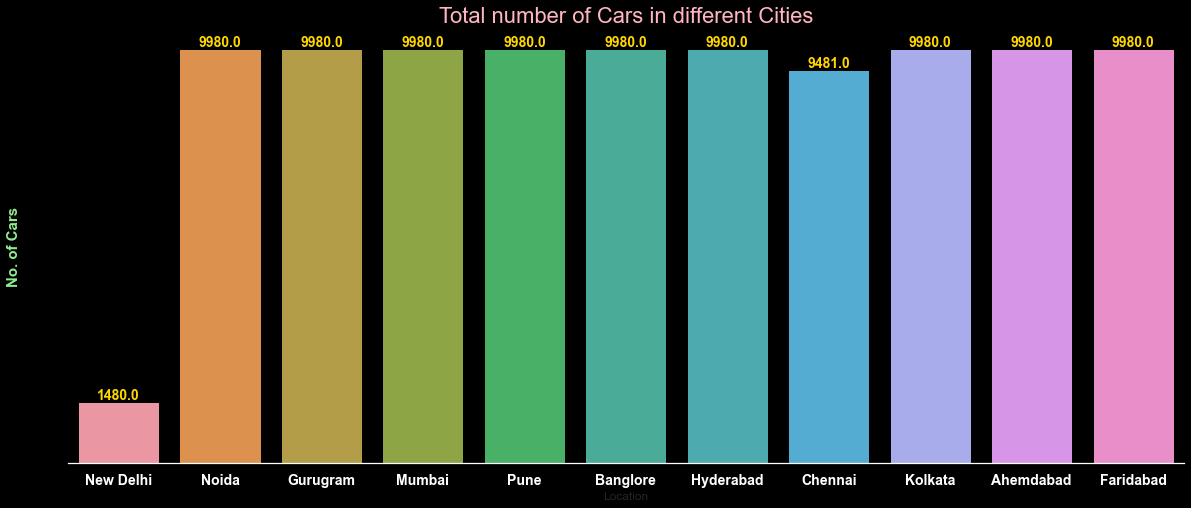

In [39]:
plt.figure(facecolor='black', figsize=(20,8))
a = sns.countplot(x='Location', data=df, edgecolor='black')
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,6.5),textcoords='offset points',fontsize=14,color='gold',fontweight='bold')
plt.title("Total number of Cars in different Cities",fontsize=22,color='lightpink')
plt.xticks(rotation=0,fontsize=14,fontweight='bold',color='white')
plt.yticks(fontsize=12,fontweight='bold',color='black')
a.set_facecolor('black')
a.set_ylabel("No. of Cars", fontsize =15, color='lightgreen',fontweight='bold')
a.spines['left'].set_color('black')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('white')
a.spines['right'].set_color('black')
plt.grid(False)
plt.show()

### 2. Percentages of cars available for sale in different cities

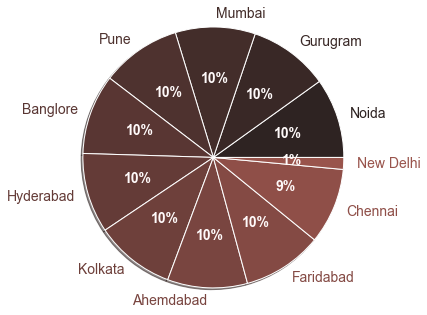

In [41]:
count = df['Location'].value_counts()
count = count.reset_index().rename(columns={'Location':'Count', 'index':'Location'})
colors = sns.set_palette('dark:salmon', 20)
patches,text, pcts= plt.pie(x='Count',labels='Location',autopct='%1.0f%%',data=count,colors=colors,radius=1.5,shadow=True,
                    textprops={'fontsize': 14})
for i, patch in enumerate(patches):
    text[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='snow',fontweight='bold')
plt.show()


### 3. Number of different Brands in all cities

In [45]:
brand_count = df['Car Brand'].value_counts().sort_values(ascending=False).reset_index().rename(columns={'index':'Brands', 'Car Brand':'Count'})

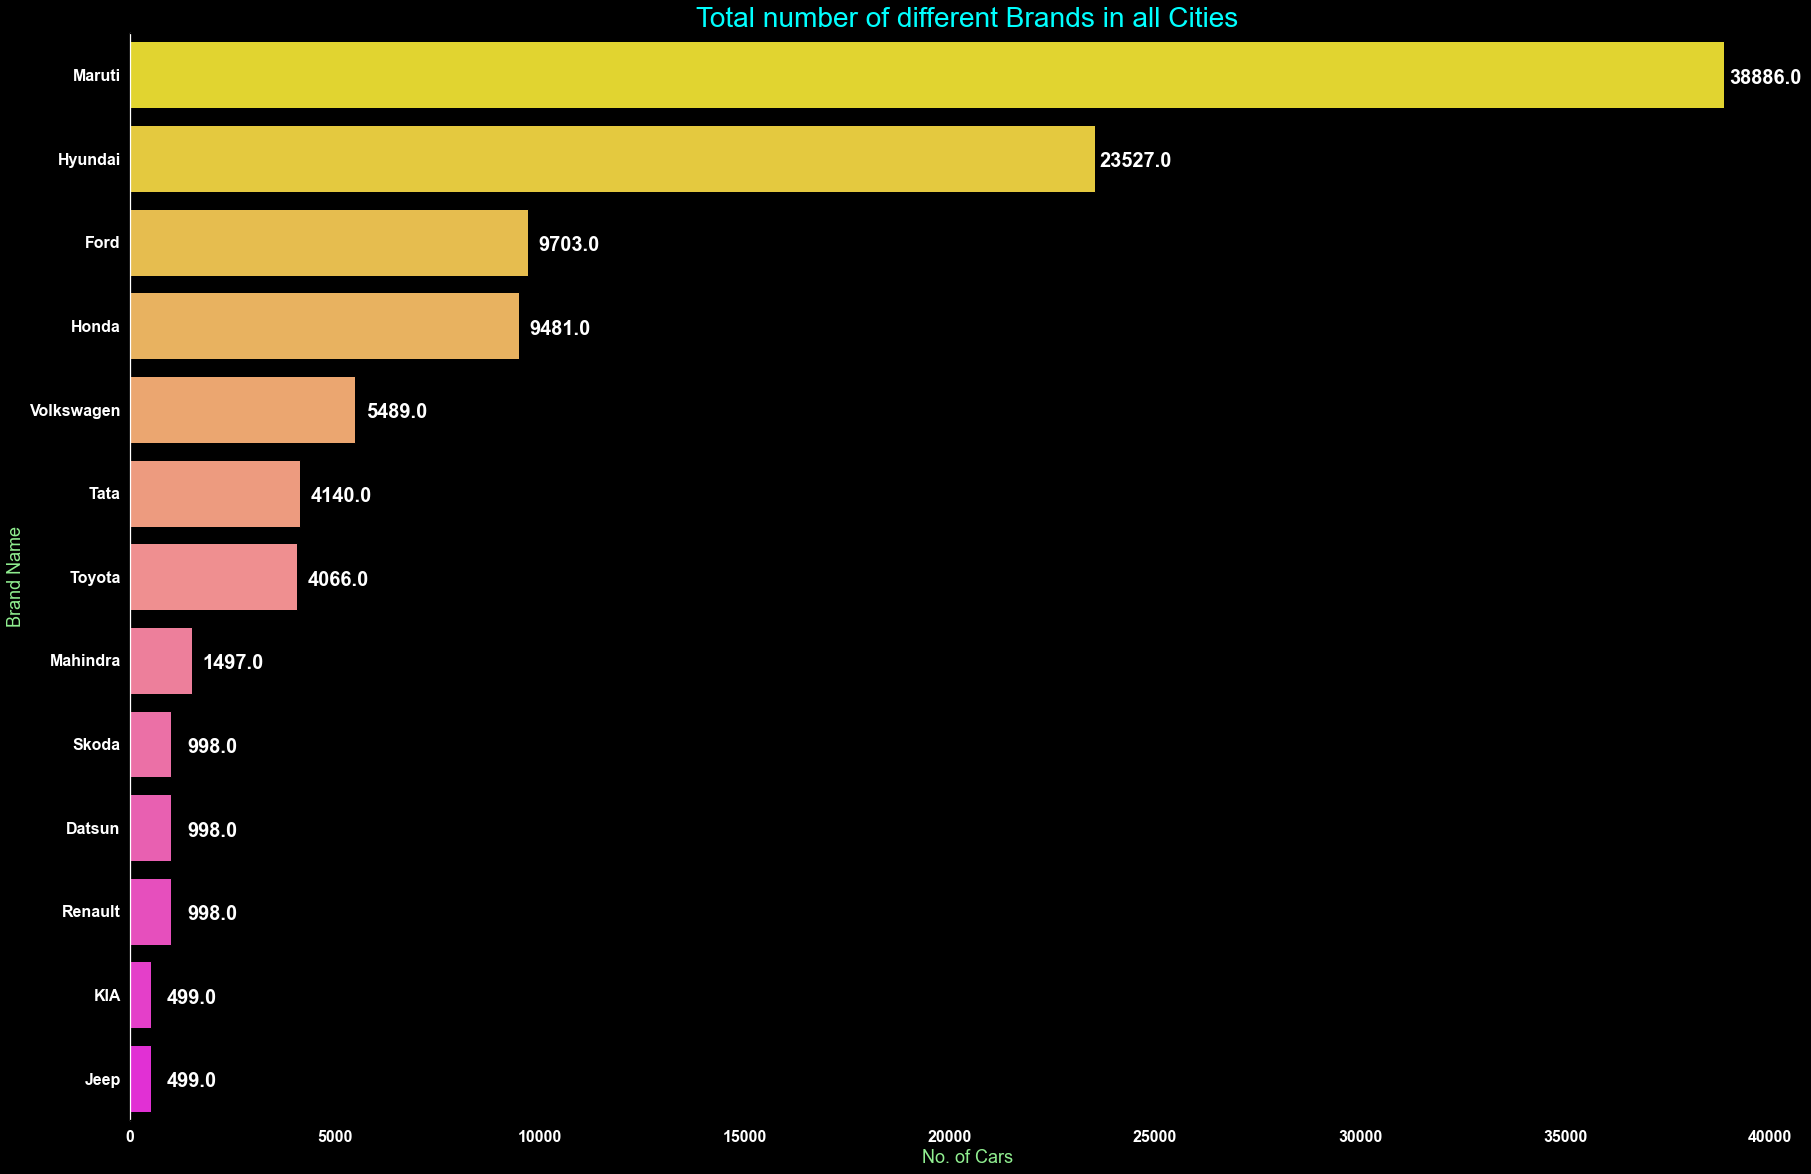

In [69]:
plt.figure(facecolor='black',figsize=(30,20))
sns.set(rc={'figure.figsize':(28,18)})
a = sns.barplot(y ='Brands',x='Count',data=brand_count,palette='spring_r',edgecolor='black')
plt.xticks(rotation=0,fontsize=16,fontweight='bold',color='white')
plt.yticks(fontsize=16,fontweight='bold',color='white')
for p in a.patches:
    width = p.get_width()
    plt.text(1000+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),ha='center',
             va='center',fontsize=20,color='white',fontweight='bold')
a.set_xlabel("No. of Cars", fontsize = 18,color='lightgreen')
a.set_ylabel("Brand Name", fontsize =18, color='lightgreen')
plt.title("Total number of different Brands in all Cities",fontsize=28,color='cyan')
a.set_facecolor('black')
a.spines['left'].set_color('white')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('black')
a.spines['right'].set_color('black')
plt.grid(False)

### 4. Average Price of all the brands

In [70]:
avg_price = df.groupby(by=['Car Brand'])['Price'].mean().sort_values(ascending=False).reset_index().rename(
    columns={'Price':'Avg Price'})
avg_price['Avg Price'] = avg_price['Avg Price'].astype(int)

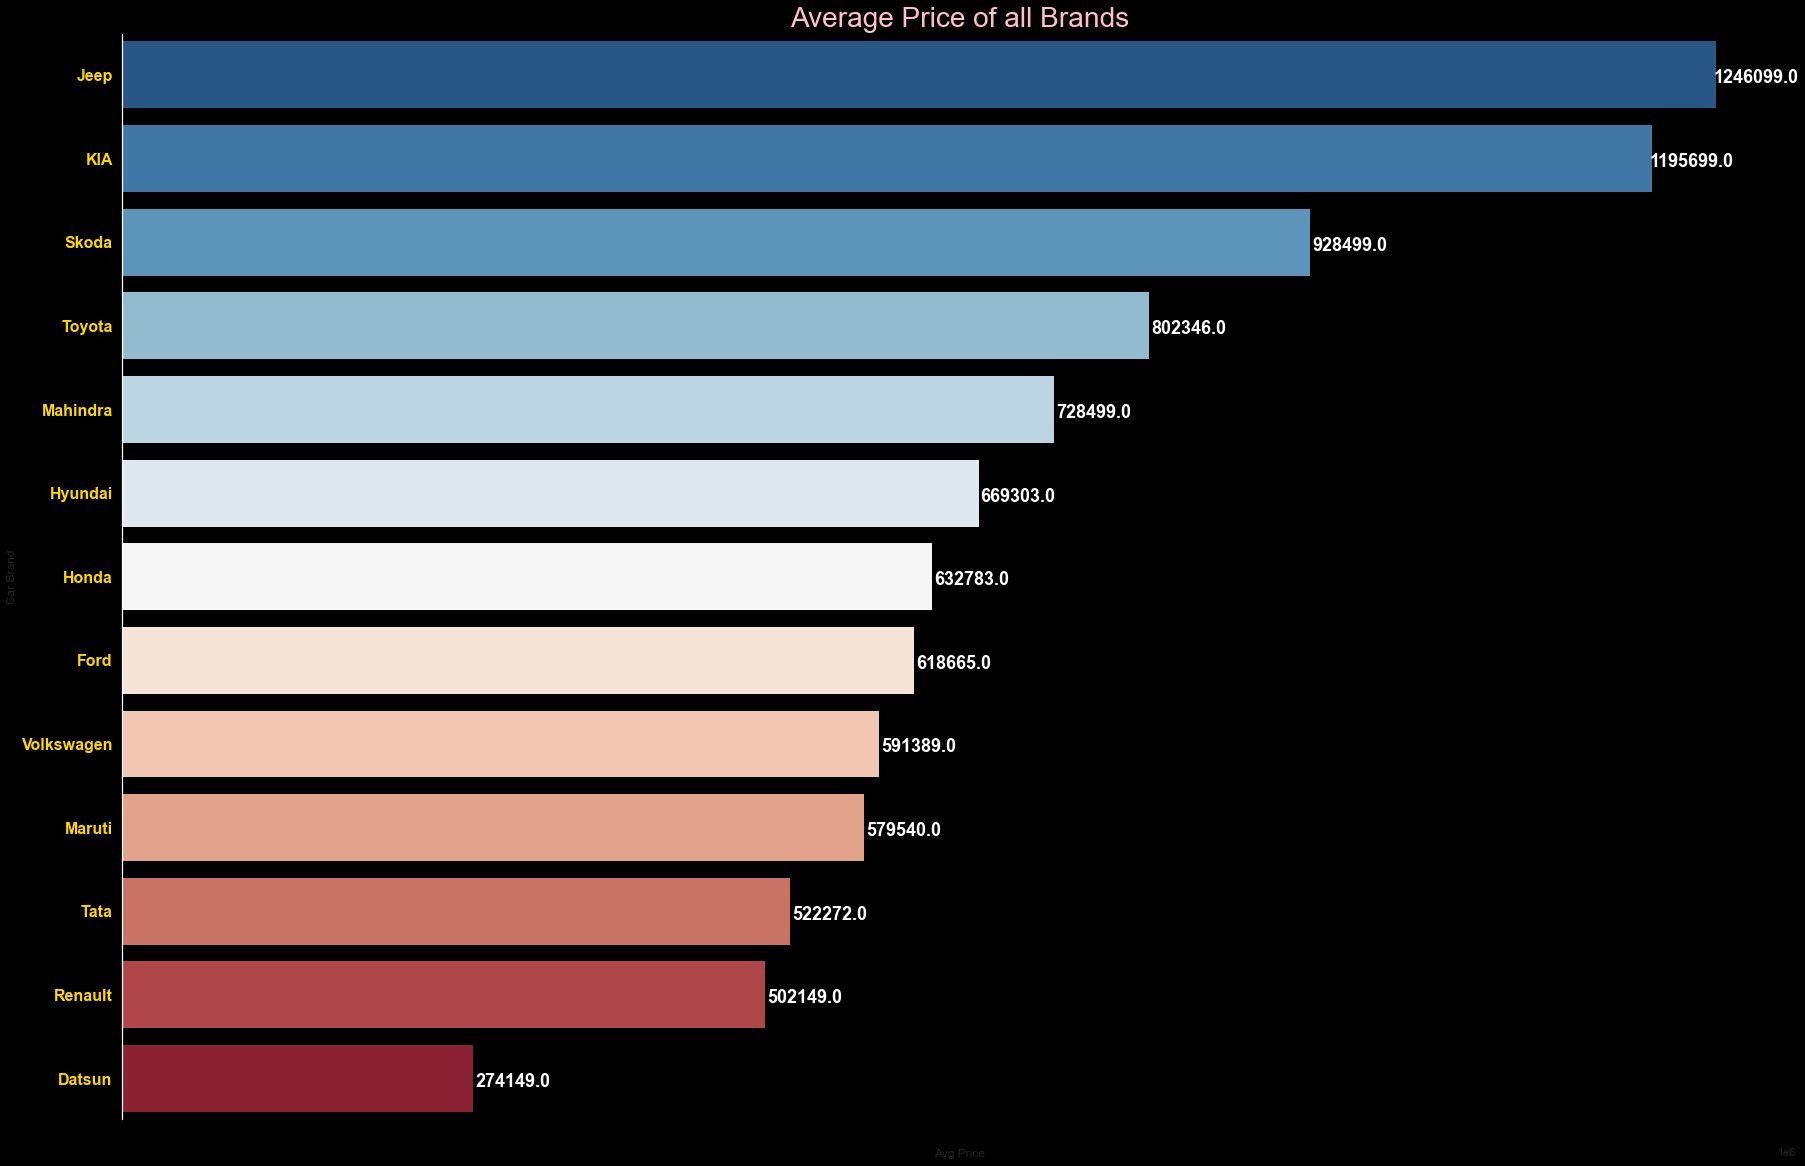

In [81]:
plt.figure(facecolor='black',figsize=(30,20))
sns.set(rc={'figure.figsize':(28,18)})
a = sns.barplot(y ='Car Brand',x='Avg Price',data=avg_price,palette='RdBu_r',edgecolor='none')
plt.xticks(rotation=0,fontsize=16,fontweight='bold',color='black')
plt.yticks(fontsize=16,fontweight='bold',color='gold')
for p in a.patches:
    width = p.get_width()
    plt.text(31000+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),ha='center',
             va='center',fontsize=18,fontweight='bold',color='white')
plt.title("Average Price of all Brands",fontsize=28,color='pink')
a.set_facecolor('black')
a.spines['left'].set_color('white')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('black')
a.spines['right'].set_color('black')
plt.grid(False)